In [1]:
import lsst.daf.persistence as dafPersist
import re
import lsst.afw.math as afwMath
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def get_mean( calexp):
    mi = calexp.getMaskedImage()
    bad = ~calexp.getMaskedImage().getMask().getPlaneBitMask(['DETECTED' ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.MEAN, sctrl)
    return (stats.getValue(afwMath.MEAN))

def get_threshold(dayDiff, factor=1):
    mi = dayDiff.getMaskedImage()
    bad = dayDiff.getMaskedImage().getMask().getPlaneBitMask(['BAD', 'SAT', 'EDGE', 'NO_DATA', ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.STDEVCLIP, sctrl)
    thres = (stats.getValue(afwMath.STDEVCLIP) * factor)
    return thres

def get_sn(img):
    try:
        sn= get_mean(img)/get_threshold(img)
    except Exception as e:
        sn = 0
    return sn

In [3]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"
butler = dafPersist.Butler(DATADIR+"detect_prod") 

In [4]:
patches = []
patches_file=open(DATADIR+"/patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()



In [5]:
dcoadd_dict = {}
for p in patches:
    if butler.datasetExists("deepCoadd", dataId={"filter":"g", "tract":0, "patch":p}):
            
            dCoadd = butler.get("deepCoadd", dataId={"filter":"g", "tract":0, "patch":p})
            dcoadd_dict[p]=dCoadd

In [6]:
butler_test = dafPersist.Butler(DATADIR+"daycoadd_tests_complete") 
dcoadd_dict_test = {}
for p in patches:
    if butler_test.datasetExists("deepCoadd", dataId={"filter":"g", "tract":0, "patch":p}):
            
            dCoadd = butler_test.get("deepCoadd", dataId={"filter":"g", "tract":0, "patch":p})
            dcoadd_dict_test[p]=dCoadd

In [7]:
len(dcoadd_dict), len(dcoadd_dict_test)

(392, 371)

In [8]:
sn_values = []
for p in patches:
    if dcoadd_dict.has_key(p):
        v1 = get_sn(dcoadd_dict[p])
    else:
        v1 = -1
    if dcoadd_dict_test.has_key(p):   
        v2 = get_sn(dcoadd_dict_test[p])
    else:
        v2 = -1
    if v1!=-1 and v2!=-1:
        sn_values.append([v1,v2])

In [9]:
sn_values = np.array(sn_values)

In [10]:
sn_values

array([[  8.06600067e-03,   1.59137126e-01],
       [  7.69944001e-02,   1.86848675e-01],
       [  8.73939764e-02,   2.46807845e-01],
       [  2.57680471e-01,   1.51098809e-01],
       [  3.51749075e-03,   1.68042006e-01],
       [  1.89006846e-02,   1.24338603e-01],
       [  4.04687043e+00,   1.85772863e-01],
       [  3.07845202e-03,   5.86795664e-02],
       [  5.14532911e-02,   1.01685616e-01],
       [ -5.03873059e-02,   1.28254958e+00],
       [  5.28038149e+05,   1.11383689e-01],
       [  2.84577046e-01,   1.46475272e-01],
       [  3.48093724e-01,   4.06994056e-01],
       [  2.86268930e-01,   2.86809984e-01],
       [  1.24747526e+00,   6.46532019e-01],
       [  5.87483450e+00,   4.84997781e-01],
       [  4.29032754e-01,   1.47505955e-01],
       [  2.88168811e-01,   2.77160969e-01],
       [  6.41117129e-01,   4.62073815e-01],
       [  3.72739121e-01,   3.72047364e-01],
       [  9.02782405e-01,   7.02484099e-01],
       [  3.34476705e-01,   4.21121774e-01],
       [  

In [11]:
control = sn_values[:,0]
test = sn_values[:,1]

(0.0, 50)

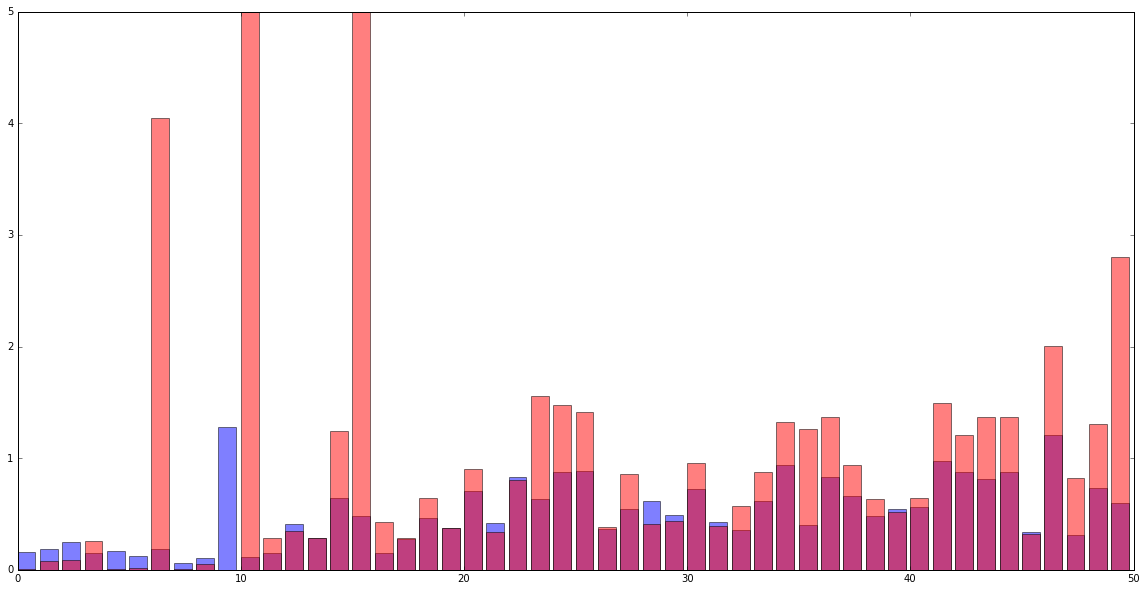

In [12]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmax=50)

(50, 100)

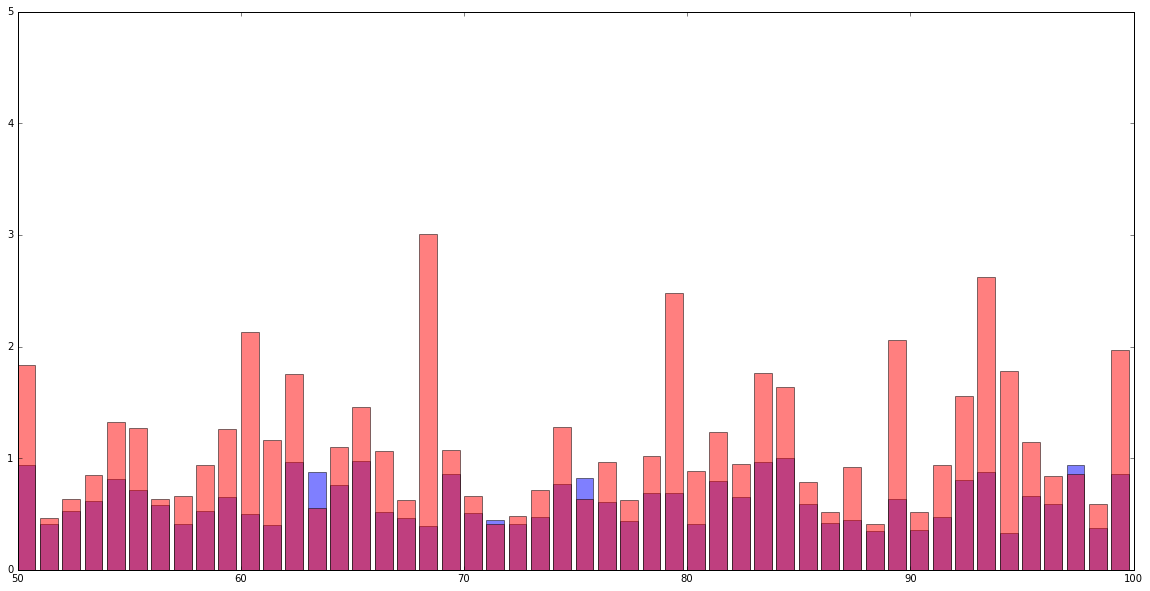

In [13]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=50, xmax=100)

(150, 200)

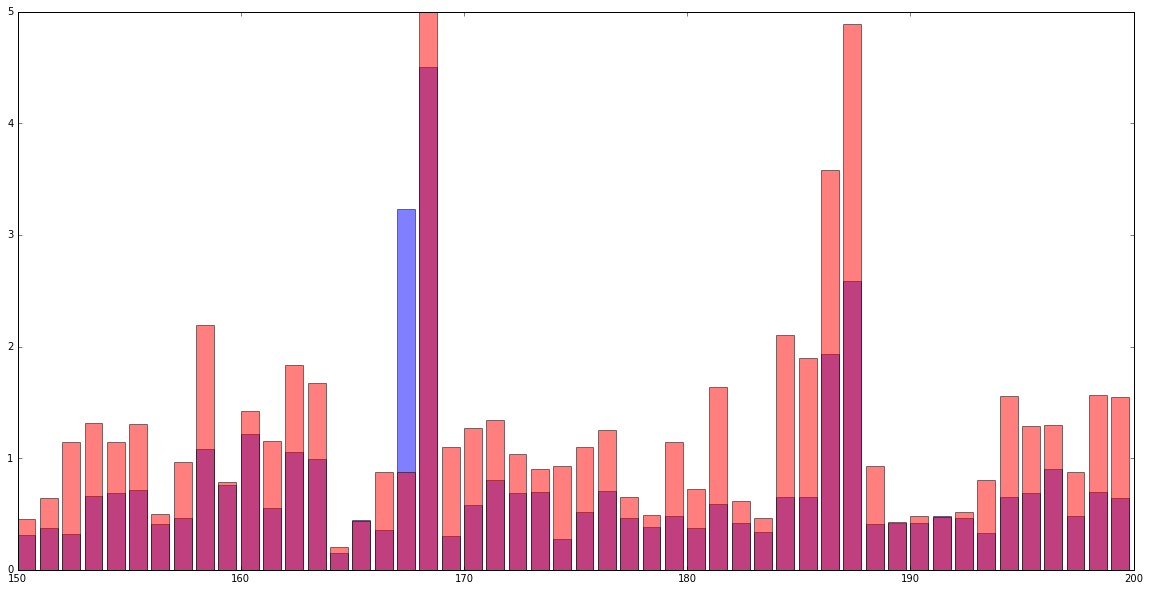

In [14]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=150, xmax=200)

(200, 250)

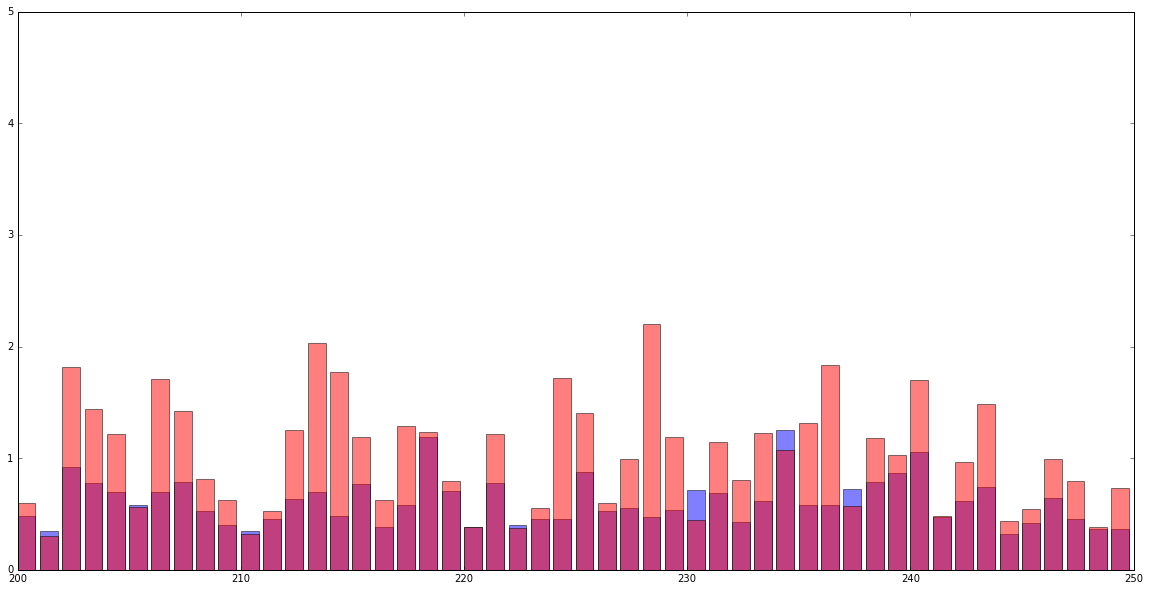

In [15]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=200, xmax=250)

(250, 300)

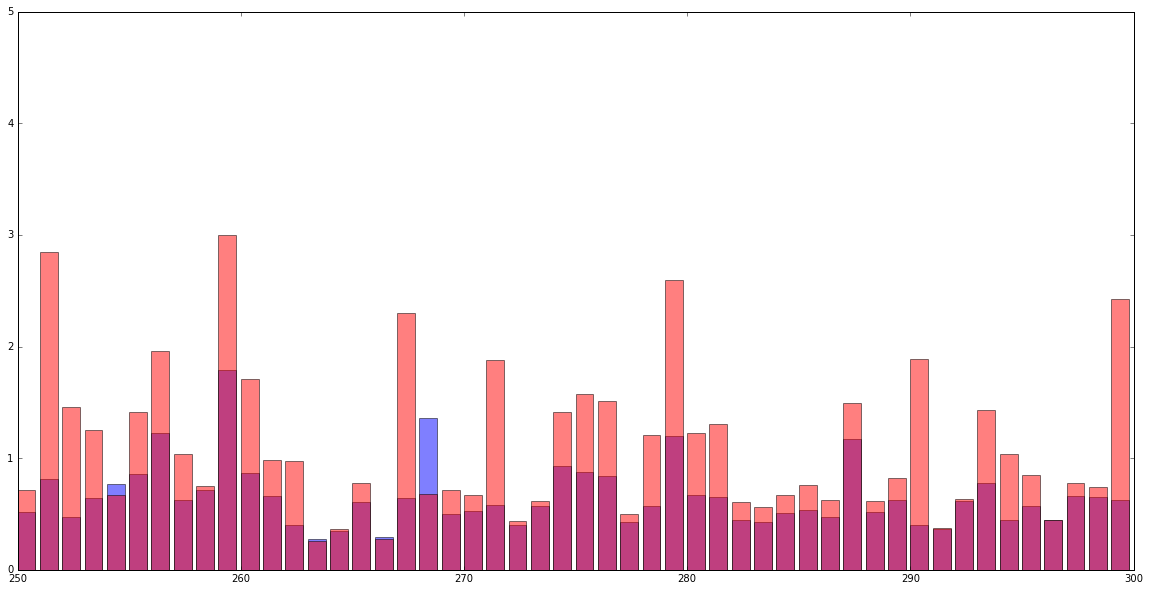

In [16]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=250, xmax=300)